In [2]:
!pip install tensorflow matplotlib numpy opencv-python


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer
from tensorflow.keras.models import Sequential


In [4]:
from tensorflow.keras.datasets import cifar10
(train_images, _), (test_images, _) = cifar10.load_data()

#32x32
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [5]:
def rgb_to_lab(images):
    lab_images = []
    for img in images:
        lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
        lab_images.append(lab_img)
    return np.array(lab_images)

train_lab = rgb_to_lab(train_images)
test_lab = rgb_to_lab(test_images)

train_l = train_lab[:,:,:,0:1] / 100.0  # normalize L channel
train_ab = train_lab[:,:,:,1:] / 128.0  # normalize ab channels

In [6]:
#model build
model = Sequential([
    InputLayer(shape=(32, 32, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(2, (3, 3), activation='tanh', padding='same')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 2)           │           1,154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,954 (1.27 MB)

 Trainable params: 333,954 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_l, train_ab, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 66s 182ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 209ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 71s 203ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 70s 198ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 68s 193ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 68s 194ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 71s 200ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 71s 202ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 9/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 10/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 70s 198ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 11/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 68s 193ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 12/50
352/352

In [8]:
def colorize_image(model, bw_image):
    l_channel = cv2.cvtColor(bw_image, cv2.COLOR_RGB2Lab)[:,:,0]
    l_channel = l_channel.reshape((1, 32, 32, 1)) / 100.0

    ab_channels = model.predict(l_channel) * 128.0
    ab_channels = ab_channels[0]

    color_image = np.zeros((32, 32, 3))
    color_image[:,:,0] = l_channel[0,:,:,0] * 100.0
    color_image[:,:,1:] = ab_channels
    color_image = cv2.cvtColor(color_image.astype(np.uint8), cv2.COLOR_Lab2RGB)

    return color_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


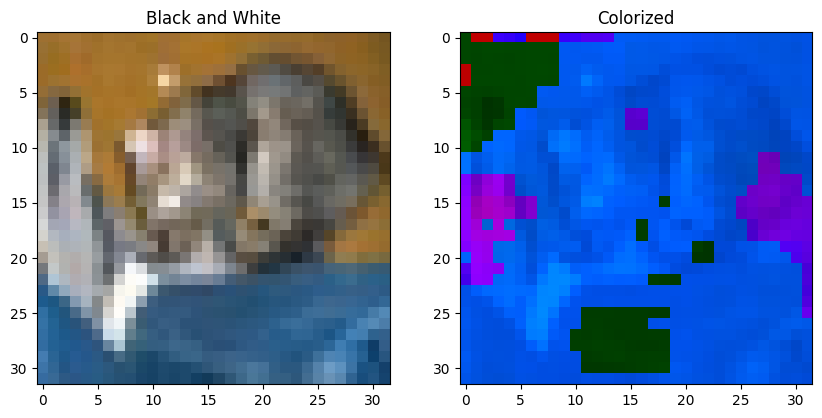

In [9]:
def show_result(bw_image, color_image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Black and White")
    plt.imshow(bw_image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Colorized")
    plt.imshow(color_image)

    plt.show()

sample_bw = test_images[0]
sample_colorized = colorize_image(model, sample_bw)
show_result(sample_bw, sample_colorized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


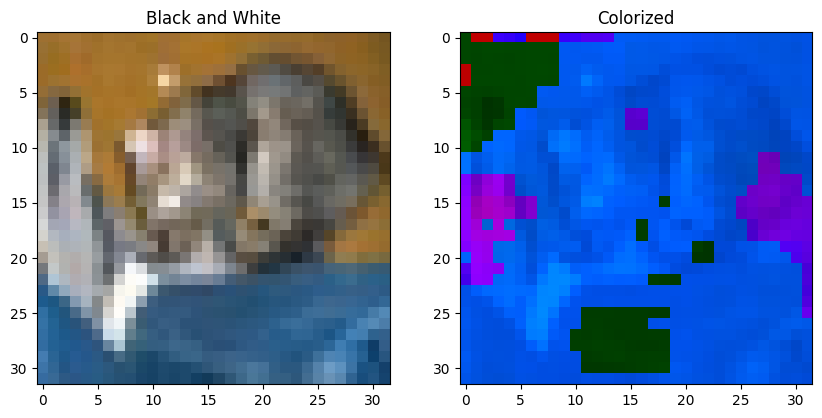

In [10]:
def show_result(bw_image, color_image):
    plt.figure(figsize=(10, 5))

    # Original Black and White
    plt.subplot(1, 2, 1)
    plt.title("Black and White")
    plt.imshow(bw_image, cmap='gray')

    # Colorized
    plt.subplot(1, 2, 2)
    plt.title("Colorized")
    plt.imshow(color_image)

    plt.show()

# Example: Colorize and show result
sample_bw = test_images[0]
sample_colorized = colorize_image(model, sample_bw)
show_result(sample_bw, sample_colorized)

In [11]:
import cv2

image = cv2.imread('C:/Users/whysu/Downloads/images.jpeg')

image_resized = cv2.resize(image, (32, 32))

image_lab = cv2.cvtColor(image_resized, cv2.COLOR_BGR2Lab)
image_l = image_lab[:, :, 0]  # L channel only
image_l = image_l.reshape((1, 32, 32, 1)) / 100.0  

In [12]:
predicted_ab = model.predict(image_l) * 128.0  # Rescale ab channels back

colorized_image_lab = np.zeros((32, 32, 3))
colorized_image_lab[:, :, 0] = image_l[0, :, :, 0] * 100.0  # Rescale L
colorized_image_lab[:, :, 1:] = predicted_ab[0]  # ab channels

colorized_image_rgb = cv2.cvtColor(colorized_image_lab.astype(np.uint8), cv2.COLOR_Lab2RGB)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


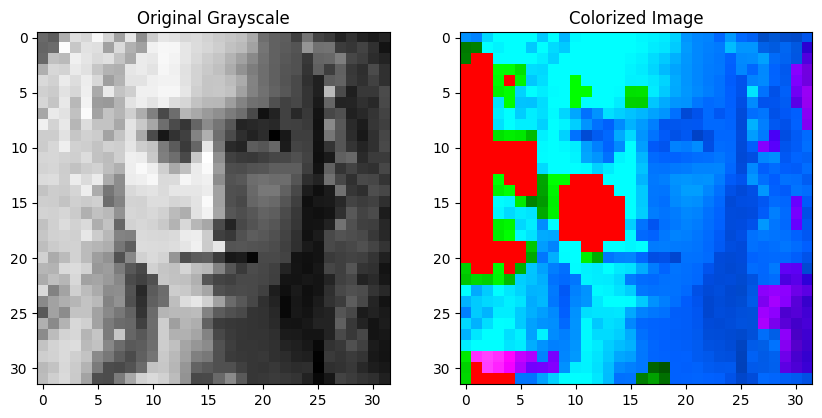

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Grayscale")
plt.imshow(image_l[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Colorized Image")
plt.imshow(colorized_image_rgb)

plt.show()

In [15]:
model.save("colorization_model.keras")